# Probability

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import binom

In [40]:
amir_deals=pd.read_csv('Datasets/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [41]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
counts

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

In [42]:
# probability of picking a deal with each product
probs = counts/amir_deals.shape[0]
probs

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64

In [43]:
# If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?
# Product C : 15
# Total products: 178
# Probab: 15/178 = 8.42%

In [44]:
# Sample 5 deals without replacement
np.random.seed(24) # setting seed so that if sample below is again retrieved, it will give same results
amir_deals.sample(5, replace = False)

,Unnamed: 0,product,client,status,amount,num_users
127,128,Product B,Current,Won,2070.25,7
148,149,Product D,Current,Won,3485.48,52
77,78,Product B,Current,Won,6252.30,27
104,105,Product D,Current,Won,4110.98,39
166,167,Product C,New,Lost,3779.86,11


In [45]:
np.random.seed(24) # after setting seed, if the sample function is called output will be same
amir_deals.sample(5, replace = False)

,Unnamed: 0,product,client,status,amount,num_users
127,128,Product B,Current,Won,2070.25,7
148,149,Product D,Current,Won,3485.48,52
77,78,Product B,Current,Won,6252.30,27
104,105,Product D,Current,Won,4110.98,39
166,167,Product C,New,Lost,3779.86,11


In [46]:
# Sample 5 deals with replacement
amir_deals.sample(5, replace = True)

,Unnamed: 0,product,client,status,amount,num_users
133,134,Product D,Current,Won,5992.86,98
101,102,Product H,Current,Won,5116.34,63
110,111,Product B,Current,Won,696.88,44
49,50,Product B,Current,Won,3488.36,79
56,57,Product D,Current,Won,6820.84,42


## Uniform Distribution


<b>Uniform distribution</b> is a probability distribution in which all outcomes are equally likely. This means that the probability of any particular outcome is the same as the probability of any other outcome.

There are two types of uniform distributions: continuous and discrete.

1. In <b>continuous uniform distribution</b>, the possible outcomes are continuous, meaning that they can take on any value within a certain range.

2. In <b>discrete uniform distribution</b>, the possible outcomes are discrete, meaning that they can only take on a finite number of values.

Here are some examples of uniform distributions:

1. Rolling a die. The probability of rolling any number from 1 to 6 is equal. This is an example of a continuous uniform distribution.
1. Tossing a coin. The probability of getting heads or tails is equal. This is an example of a discrete uniform distribution.
1. Drawing a card from a deck. The probability of drawing any card from the deck is equal. This is an example of a continuous uniform distribution.
1. Choosing a random number between 0 and 1. The probability of choosing any number between 0 and 1 is equal. This is an example of a continuous uniform distribution.

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up.

In [47]:
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [48]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [49]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


#### Simulating wait times

In [50]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30,size=1000)
print(wait_times)

[1.75373261e+01 2.71316477e+01 5.81790338e-01 1.55829141e+01
 7.87247851e+00 1.97407454e+01 1.95508372e+01 1.54978067e+01
 1.01092394e+01 1.84420030e+01 2.49413649e+01 4.79309626e+00
 8.47208009e+00 5.44361501e+00 2.20829437e+01 2.31574772e+01
 2.08429962e+01 1.05714114e+01 2.40121561e+01 9.28704325e+00
 2.04256823e+00 1.87270672e+01 4.64697154e+00 1.02954454e+01
 1.80831020e+01 2.60343045e+01 2.78236924e+01 2.12401434e+01
 2.76736953e+01 2.86192490e+01 2.57458966e+01 2.88547712e+01
 2.16294810e+01 6.57755771e+00 2.36467739e+00 1.21750566e+01
 2.35862737e+01 1.84042611e+01 2.16468053e+01 3.91104506e+00
 2.96133933e+01 8.89948926e+00 6.98799160e+00 4.82395554e+00
 2.05445006e+01 2.97970714e+01 1.71081228e+00 1.50823281e+01
 9.53534698e+00 2.31547495e+01 4.38293596e+00 2.33061210e+01
 1.07252149e+01 9.20592432e-01 2.60942483e+01 2.34553695e+01
 5.04155388e+00 2.84702363e+01 2.85820269e+01 1.72178961e+00
 8.90894493e+00 1.95660184e+01 2.76137035e+01 9.31256957e-01
 1.86640971e+01 1.744878

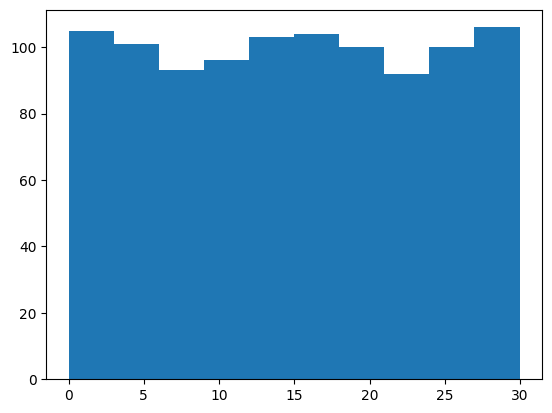

In [51]:
plt.hist(wait_times)
plt.show()

## Binomial Distribution

A way of calculating the probability of getting a certain number of successes in a series of trials, where each trial has only two possible outcomes.

E.g. No. of heads in a sequence of coin flips

### Generate Random Values

        binom.rvs(no of trials , prob of heads/success, size = no of samples)
        binom.rvs(no of coins , prob of heads, size = no of flips)
        binom.rvs(n,p,size)

In [52]:
# For now, we have only one coin or trial and we only flipped it once.
# Chance for getting heads/success or tails/loss will be same i.e. 50% or 0.5

binom.rvs(1, 0.5, size=1)

# if it returns 1, then it means head
# if 0, then tails

array([1], dtype=int64)

In [53]:
# for 10 flips

binom.rvs(1, 0.5, size = 10)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [56]:
# for 2 coins and 10 flips
binom.rvs(2, 0.5, size = 10)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 2], dtype=int64)

[1, 1, 0, 1, 1, 1, 1, 0, 1, 2]

The output above explains that:

1. At the first flip of both the first and second coin, we get only one head/success.
1. The same goes for the second flip.
1. At the third flip, we don't get any heads/successes out of both the first and second coin.
1. The same pattern continues.
1. At the last flip, we get two heads from both the first and second coin.

In [57]:
# for 10 coins and 3 flips
binom.rvs(10, 0.5, size = 3)

array([7, 8, 5], dtype=int64)

[7, 8, 5]

1. At first flip, we get 7 heads out of 10 coins.
2. At second flip, we get 8 heads out of 10 coins.
3. At third flip, we get 5 heads out of 10 coins.

### Probability Mass Function
The PMF gives the probability of a random variable taking on a specific value.

        binom.pmf(no of heads, no of trials, prob of heads)
        binom.pmf(k,n,p)

In [66]:
# For probability of 7 heads
binom.pmf(7, 10, 0.5)

# 0.11718749999999996 - If we flip 10 coins, there's about a 12% chance that exactly 7 of them will be heads.

0.11718749999999996

### Cumulative Distriutive Function  
The CDF gives the probability of a random variable being less than or equal to a specific value.

        binom.cdf(no of heads, no of trials, prob of heads)
        binom.cdf(k,n,p)

In [70]:
# For probability of less than or equal to 7 heads
binom.cdf(7, 10, 0.5)

# 0.9453125 - The probability of getting 7 or fewer heads out of 10 coins is about 95%.

0.9453125

In [71]:
# For probability of greater than 7 heads
1 - binom.cdf(7, 10, 0.5)

# 0.0546875 - The probability of getting greater than 7 heads out of 10 coins is about 5.4%.

0.0546875

### Expected Value = n * p

In [73]:
# expected number of heads for 10 flips
10 * 0.5

5.0

Dataset:

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution.

In [83]:
# Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
binom.rvs(1, 0.3, size = 1)

array([1], dtype=int64)

In [85]:
# Simulate 1 week of 3 deals
binom.rvs(3, 0.3, size = 1)

array([0], dtype=int64)

In [86]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)
prob_3

0.027

In [87]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 =binom.cdf(1,3,0.3)
prob_less_than_or_equal_1

0.784
